In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Specify the path to the directory where your dataset files are located
directory_path = r"C:\Users\Onwer\Downloads\yash\IG\\"

# Load the training dataset into a pandas DataFrame
train_data = pd.read_csv(directory_path + 'adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# Load the test dataset into a pandas DataFrame
test_data = pd.read_csv(directory_path + 'adult.test', header=None, skiprows=1, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# Concatenate the training and test data
data = pd.concat([train_data, test_data], ignore_index=True)

# Display the first few rows of the concatenated dataset
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [54]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [55]:
data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [56]:
print("Unique values in education-num: ",data['education-num'].unique())
# Iterate over each column and print unique values for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("------------------------------------------------------")


Unique values in education-num:  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
------------------------------------------------------
Unique values in column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
------------------------------------------------------
Unique values in column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
------------------------------------------------------
Unique values in column 'occupation':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' 

In [57]:
import numpy as np 
# Replace '?' with NaN in the entire DataFrame
data = data.replace(' ?', np.nan)

# Display unique values in the 'workclass' column after replacement
print(data['workclass'].unique())



[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [58]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [59]:
# Noticing this and the data.head() we can say education-num and education column are same

In [60]:
# Find the number of duplicate rows
num_duplicates = data.duplicated().sum()

# Drop duplicate rows from the DataFrame
data.drop_duplicates(inplace=True)

# Print the number of duplicate rows found
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 29


In [61]:
data.drop('education',axis=1,inplace=True) # Numerical representation is already in the dataset
data.drop('capital-gain',axis=1,inplace=True) #Majority of the data is '0' which makes the column unfit
data.drop('capital-loss',axis=1,inplace=True)
data.drop('relationship',axis=1,inplace=True) # It holds no useful information 

In [62]:
# Replace the values with 'Married'
# Convert all values to lowercase and remove leading/trailing spaces
data['marital-status'] = data['marital-status'].str.lower().str.strip()
# Replace the values with 'married' (case-insensitive)
data['marital-status'].replace(['married-civ-spouse', 'married-spouse-absent', 'married-af-spouse'], 'married', inplace=True)
data['marital-status'].replace(['divorced'], 'separated', inplace=True)

# Check unique values after replacement
print("\nUnique values after replacement:")
print(data['marital-status'].unique())


Unique values after replacement:
['never-married' 'married' 'separated' 'widowed']


In [63]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education-num        0
marital-status       0
occupation        2809
race                 0
sex                  0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       46014 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education-num   48813 non-null  int64 
 4   marital-status  48813 non-null  object
 5   occupation      46004 non-null  object
 6   race            48813 non-null  object
 7   sex             48813 non-null  object
 8   hours-per-week  48813 non-null  int64 
 9   native-country  47957 non-null  object
 10  income          48813 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.5+ MB


In [65]:
data.dropna(inplace=True) #Drop null values 

In [66]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [67]:
# Remove extra spaces and periods from 'income' column
data['income'] = data['income'].str.strip().str.rstrip('.')

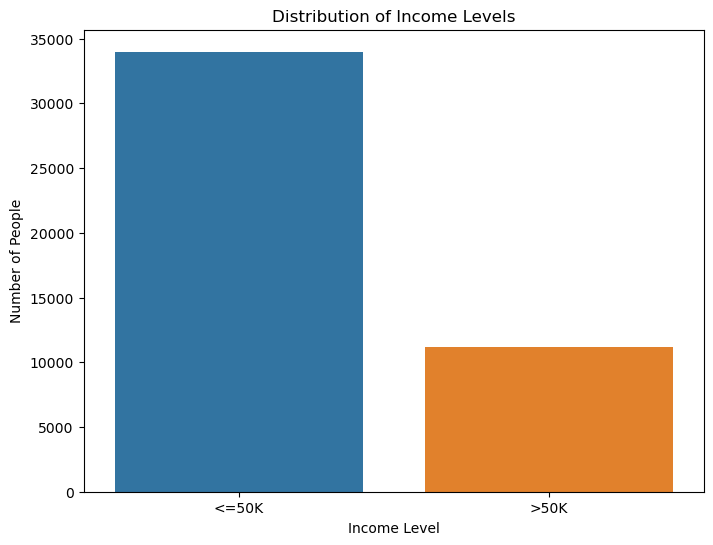

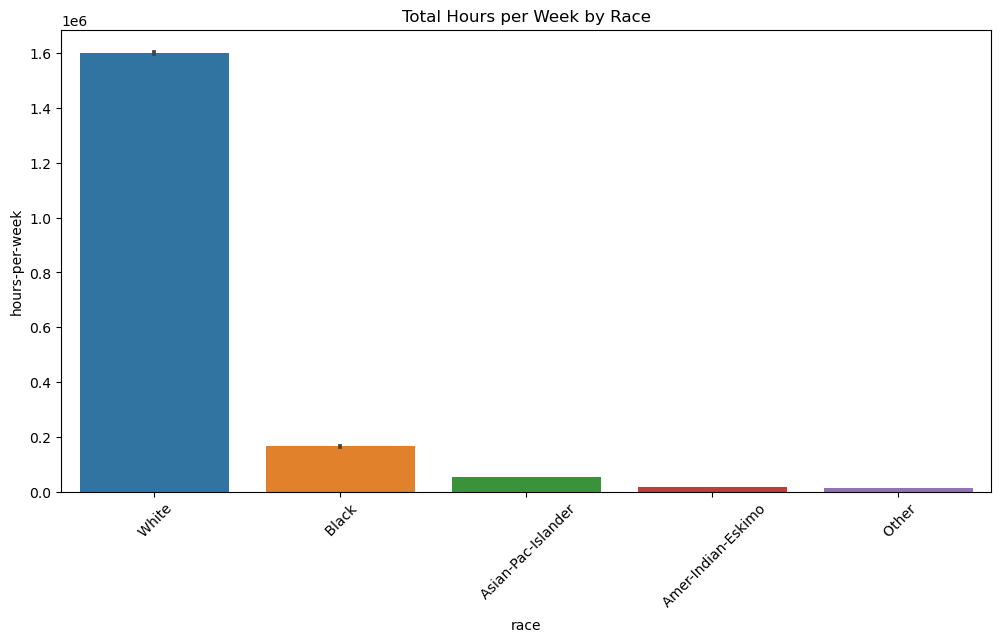

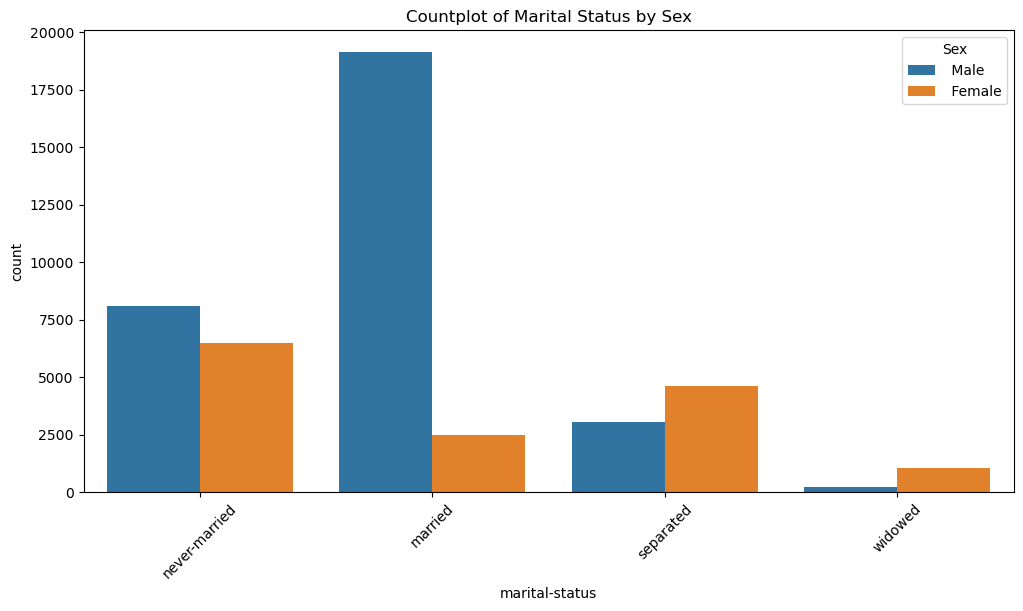

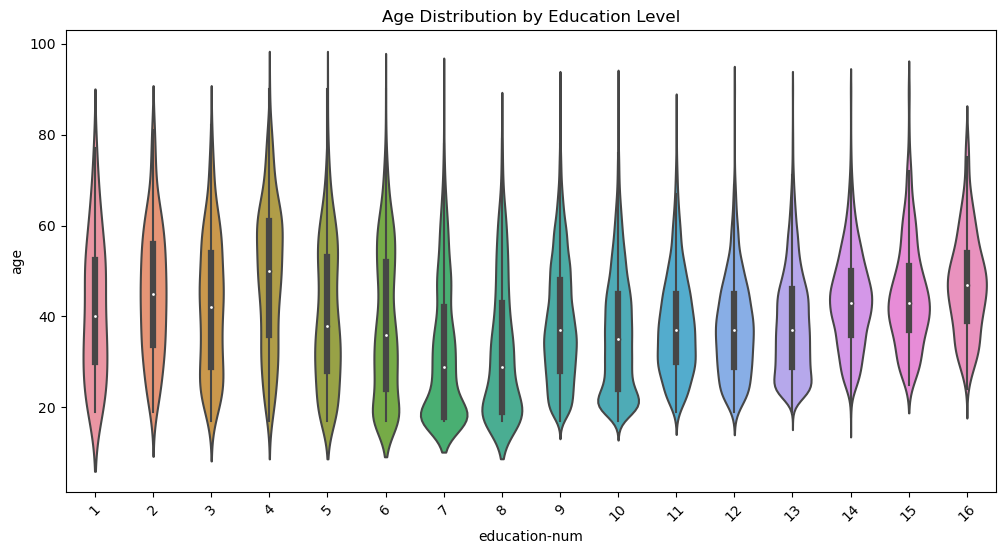

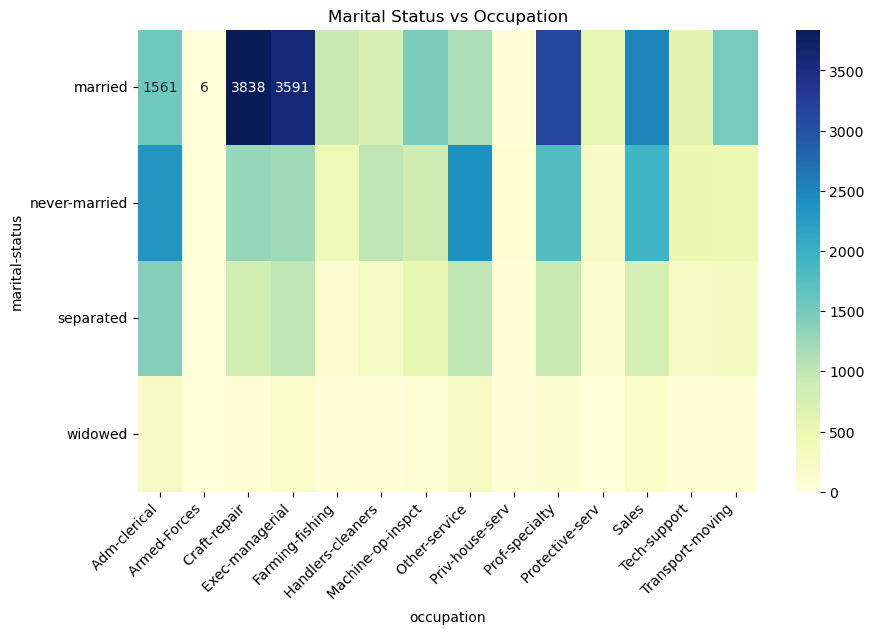

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Count the number of people earning over 50k and under 50k
income_counts = data['income'].value_counts()

# Plot the distribution of income levels
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Number of People')
plt.show()

# Categorical vs Numerical: Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='race', y='hours-per-week', data=data, estimator=sum)
plt.title('Total Hours per Week by Race')
plt.xticks(rotation=45)
plt.show()

# Categorical vs Categorical: Countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', hue='sex', data=data)
plt.title('Countplot of Marital Status by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

# Categorical vs Numerical: Violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x='education-num', y='age', data=data)
plt.title('Age Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

# Categorical vs Categorical: Crosstab and Heatmap
ct = pd.crosstab(data['marital-status'], data['occupation'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Marital Status vs Occupation')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis tick labels
plt.yticks(rotation=0)  # Adjust y-axis tick labels
plt.show()


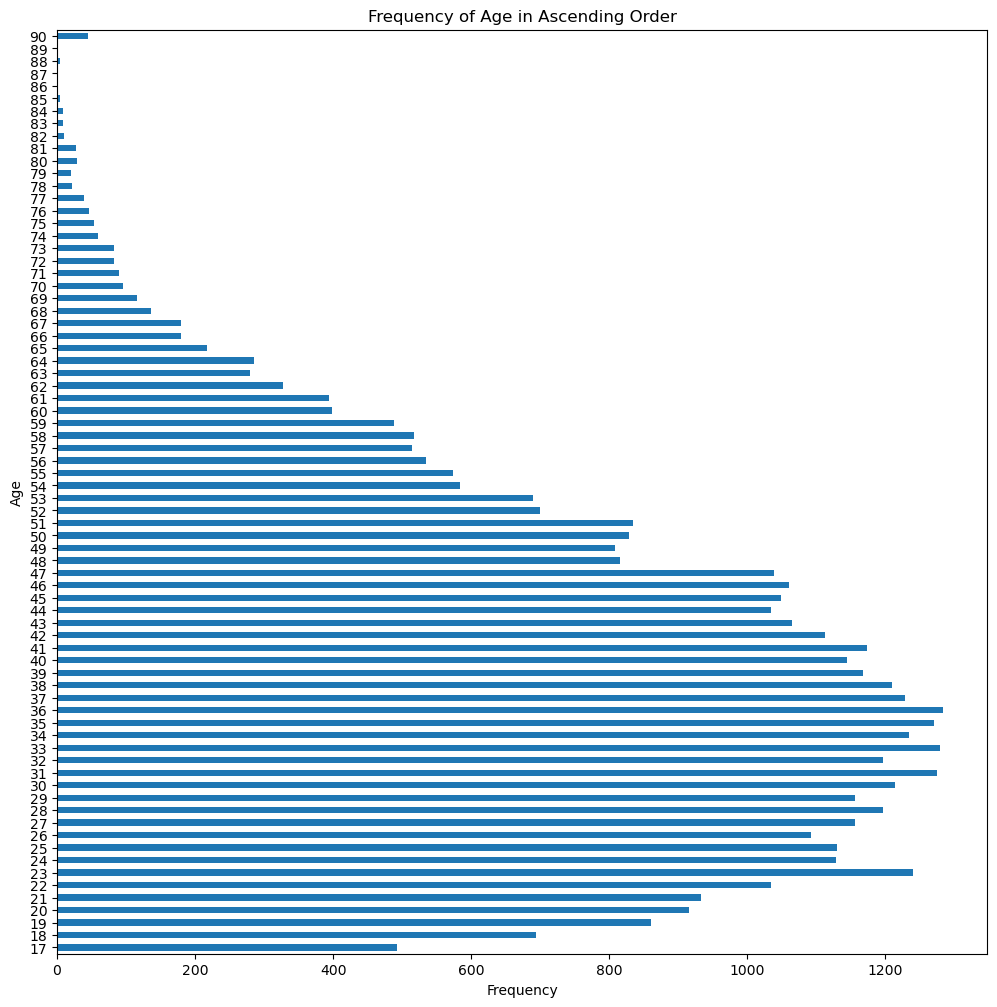

In [69]:
import matplotlib.pyplot as plt

# Sort the age value counts series by index (ascending order of age)
sorted_age_counts = data.age.value_counts().sort_index()

# Plot the sorted age counts in a horizontal bar plot
plt.figure(figsize=(12, 12))
sorted_age_counts.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Frequency of Age in Ascending Order')

plt.show()


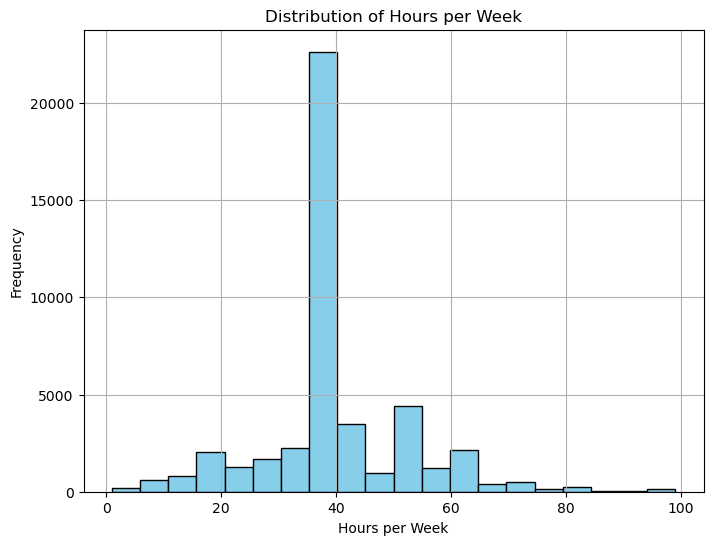

In [70]:
import matplotlib.pyplot as plt

# Creating a histogram for the 'hours-per-week' column
plt.figure(figsize=(8, 6))
plt.hist(data['hours-per-week'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


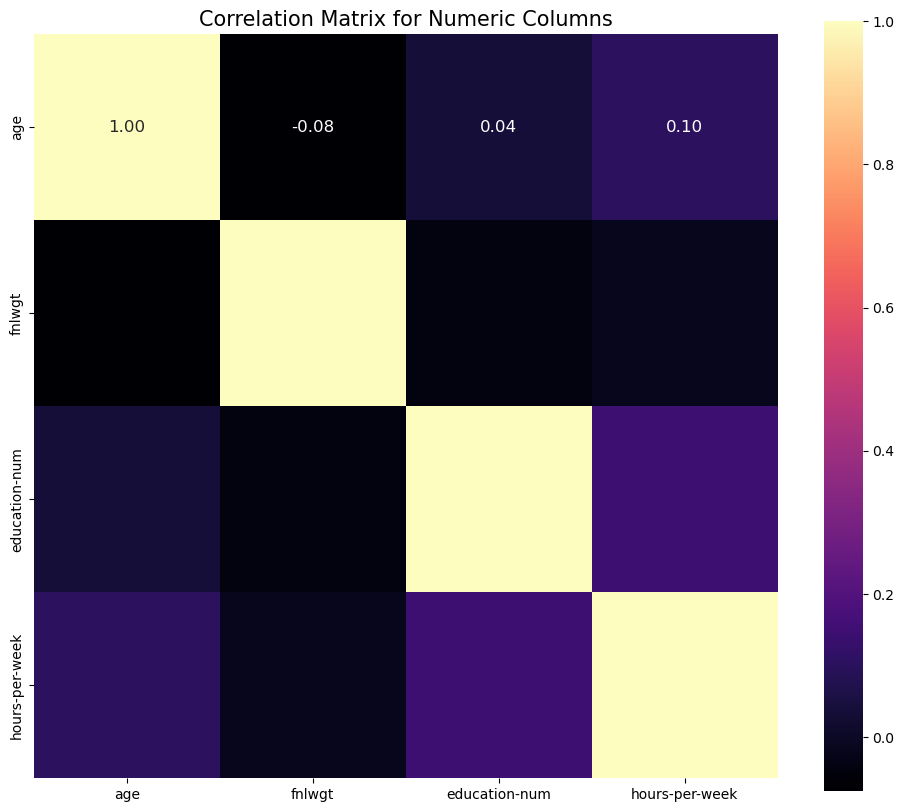

In [71]:
# Ensure that only numeric columns are selected for correlation matrix
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()
# Plotting the heatmap with larger font size for annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="magma", square=True, annot_kws={"fontsize": 12})
plt.title("Correlation Matrix for Numeric Columns", fontsize=15)
plt.show()


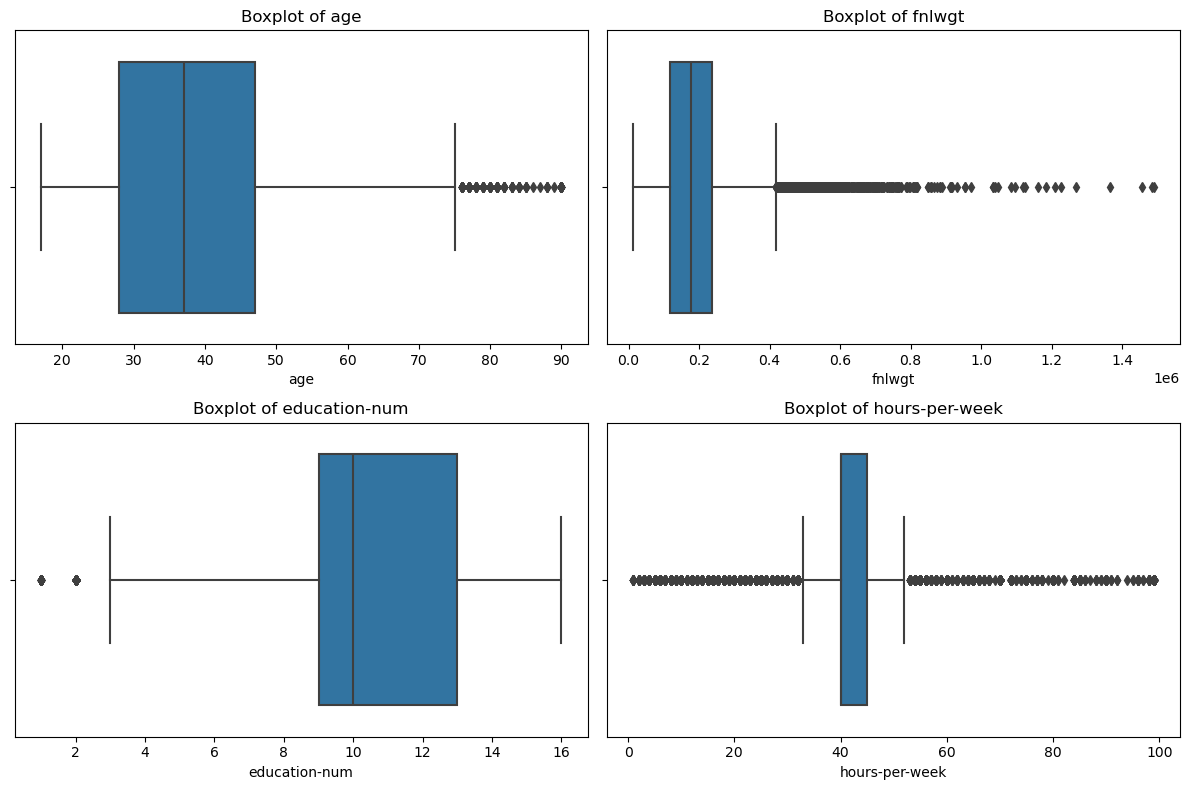

Summary of Outliers:
age                 268
fnlwgt             1332
education-num       291
hours-per-week    11892
dtype: int64


In [72]:

# Calculate quartiles and IQR for each numeric column
quartiles = data[numeric_columns].quantile([0.25, 0.75])
Q1 = quartiles.loc[0.25]
Q3 = quartiles.loc[0.75]
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each numeric column
outliers = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound))

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Print summary of outliers
print("Summary of Outliers:")
print(outliers.sum())

In [73]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Label Encoding for 'sex' column
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
# Encode the 'income' column
data['income'] = label_encoder.fit_transform(data['income'])
# 2. Target Encoding for 'native-country' column
target_encoder = ce.TargetEncoder()
data['native-country'] = target_encoder.fit_transform(data['native-country'], data['income'])

# 3. One-Hot Encoding for the rest of the categorical columns
categorical_columns = ['workclass', 'occupation', 'race','marital-status']
one_hot_encoder = ce.OneHotEncoder(cols=categorical_columns, drop_invariant=True)
data = one_hot_encoder.fit_transform(data)

data.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education-num,...,occupation_14,race_1,race_2,race_3,race_4,race_5,sex,hours-per-week,native-country,income
0,39,1,0,0,0,0,0,0,77516,13,...,0,1,0,0,0,0,1,40,0.253114,0
1,50,0,1,0,0,0,0,0,83311,13,...,0,1,0,0,0,0,1,13,0.253114,0
2,38,0,0,1,0,0,0,0,215646,9,...,0,1,0,0,0,0,1,40,0.253114,0
3,53,0,0,1,0,0,0,0,234721,7,...,0,0,1,0,0,0,1,40,0.253114,0
4,28,0,0,1,0,0,0,0,338409,13,...,0,0,1,0,0,0,0,40,0.255639,0


In [74]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the entire dataset
scaled_data = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education-num,...,occupation_14,race_1,race_2,race_3,race_4,race_5,sex,hours-per-week,native-country,income
0,0.033918,4.714239,-0.302769,-1.671428,-0.179191,-0.271376,-0.194354,-0.021561,-1.062310,1.128863,...,-0.071521,0.403097,-0.321217,-0.172232,-0.098584,-0.088726,0.693782,-0.078393,0.119245,-0.574199
1,0.866264,-0.212123,3.302851,-1.671428,-0.179191,-0.271376,-0.194354,-0.021561,-1.007453,1.128863,...,-0.071521,0.403097,-0.321217,-0.172232,-0.098584,-0.088726,0.693782,-2.327209,0.119245,-0.574199
2,-0.041750,-0.212123,-0.302769,0.598291,-0.179191,-0.271376,-0.194354,-0.021561,0.245251,-0.438517,...,-0.071521,0.403097,-0.321217,-0.172232,-0.098584,-0.088726,0.693782,-0.078393,0.119245,-0.574199
3,1.093267,-0.212123,-0.302769,0.598291,-0.179191,-0.271376,-0.194354,-0.021561,0.425818,-1.222207,...,-0.071521,-2.480795,3.113157,-0.172232,-0.098584,-0.088726,0.693782,-0.078393,0.119245,-0.574199
4,-0.798428,-0.212123,-0.302769,0.598291,-0.179191,-0.271376,-0.194354,-0.021561,1.407344,1.128863,...,-0.071521,-2.480795,3.113157,-0.172232,-0.098584,-0.088726,-1.441375,-0.078393,0.178948,-0.574199


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and the target variable (y)
X = data.drop('income', axis=1)
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classification models
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
]

# Iterate through each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print or store the evaluation results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("=" * 50)


C:\Users\Onwer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression
Accuracy: 0.7499, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Model: RandomForestClassifier
Accuracy: 0.8222, Precision: 0.6680, Recall: 0.5750, F1 Score: 0.6180
Model: XGBClassifier
Accuracy: 0.8337, Precision: 0.6934, Recall: 0.6011, F1 Score: 0.6439
Model: KNeighborsClassifier
Accuracy: 0.7228, Precision: 0.4068, Recall: 0.2366, F1 Score: 0.2992


In [76]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = XGBClassifier()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_result = grid_search.fit(X_train, y_train)

# Print best parameters found
print("Best Parameters: ", grid_result.best_params_)

# Train the model with the best parameters
best_model = XGBClassifier(**grid_result.best_params_)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.840358446730833
